In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from keras import layers, losses, utils
from keras.datasets import cifar10

### Load the CIFAR10 dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

#### Show some samples

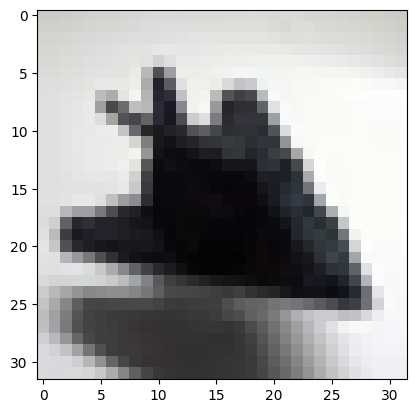

In [11]:
plt.imshow(train_images[np.random.randint(0, 50)])

### Generator

In [ ]:
def Generator():
    generator = keras.Sequential()

    generator.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU())

    generator.add(layers.Reshape((7, 7, 256)))
    assert generator.output_shape == (None, 7, 7, 256)

    generator.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding="same", use_bias=False))
    assert generator.output_shape == (None, 7, 7, 128)

    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU)

    generator.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding="same", use_bias=False, activation="tanh"))
    assert generator.output_shape == (None, 32, 32, 1)

    return generator



### Discriminator

In [ ]:
# TODO: Create Discrimator model for true/false classifcation from generator output